In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys
sys.path.insert(0, '../scripts/')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from datetime import datetime, timedelta
from plots import Plots
from data_cleaning import DataCleaner
%matplotlib inline

In [9]:
pwd = os.getcwd()

train_file_path = os.path.join(pwd, os.pardir, "data/train.csv")
test_file_path = os.path.join(pwd, os.pardir, "data/test.csv")
store_file_path = os.path.join(pwd, os.pardir, "data/store.csv")

In [10]:
df_train = pd.read_csv(train_file_path, dtype={'StateHoliday': object}, parse_dates=["Date"])
df_test = pd.read_csv(test_file_path, dtype={'StateHoliday': object}, parse_dates=["Date"])
df_store = pd.read_csv(store_file_path)

In [11]:
data_cleaner_train = DataCleaner(df_train)

In [12]:
data_cleaner_train.show_missing_percentages()

Store            100.0
DayOfWeek        100.0
Date             100.0
Sales            100.0
Customers        100.0
Open             100.0
Promo            100.0
StateHoliday     100.0
SchoolHoliday    100.0
dtype: float64

In [13]:
data_cleaner_test = DataCleaner(df_test)

In [14]:
data_cleaner_test.show_missing_percentages()

Id               100.000000
Store            100.000000
DayOfWeek        100.000000
Date             100.000000
Open              99.973228
Promo            100.000000
StateHoliday     100.000000
SchoolHoliday    100.000000
dtype: float64

In [15]:
data_cleaner_test.fill_missing_column_zero("Open")

In [16]:
data_cleaner_store = DataCleaner(df_store)

In [17]:
data_cleaner_store.show_missing_percentages()

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

In [18]:
data_cleaner_store.fill_missing_column_zero("CompetitionDistance")
data_cleaner_store.fill_missing_column_zero("CompetitionOpenSinceMonth")
data_cleaner_store.fill_missing_column_zero("CompetitionOpenSinceYear")
data_cleaner_store.fill_missing_column_zero("Promo2SinceWeek")
data_cleaner_store.fill_missing_column_zero("Promo2SinceYear")

In [19]:
data_cleaner_store.fill_missing_empty_string("PromoInterval")

In [20]:
df_train_clean = data_cleaner_train.dataframe
df_test_clean = data_cleaner_test.dataframe
df_store_clean = data_cleaner_store.dataframe

In [21]:
df_train_clean.to_csv(os.path.join(pwd, os.pardir, "data/train_clean.csv"), index=False)
df_test_clean.to_csv(os.path.join(pwd, os.pardir, "data/test_clean.csv"), index=False)
df_store_clean.to_csv(os.path.join(pwd, os.pardir, "data/store_clean.csv"), index=False)

In [22]:
df_train_store = pd.merge(df_train_clean, df_store_clean, how = 'left', on = 'Store')
df_test_store = pd.merge(df_test_clean, df_store_clean, how = 'left', on = 'Store')

In [161]:
# data_cleaner.fill_missing_median()

In [23]:
data_cleaner = DataCleaner(df_train_store)

In [25]:
data_cleaner.remove_closed_stores()

In [27]:
data_cleaner.dataframe["Sales"].describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [28]:
data_cleaner.remove_outliers("Sales")

<AxesSubplot:>

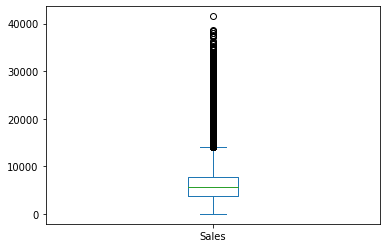

In [29]:
df_train_store["Sales"].plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

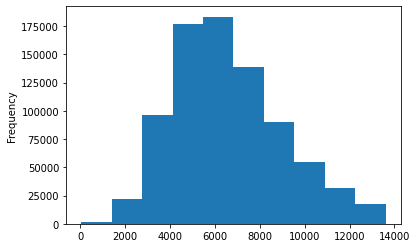

In [30]:
data_cleaner.dataframe["Sales"].plot(kind="hist")

In [31]:
data_cleaner.scale_dataframe()

In [32]:
data_cleaner.dataframe

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,-1.723137,0.848235,-0.546063,-0.535808,0.0,1.137629,2.049443,-0.541901,0.948218,0.683667,-1.013415,-0.766266,-1.013415
1,-1.720041,0.848235,-0.215209,-0.306968,0.0,1.137629,2.049443,-0.631367,1.414336,0.682599,0.986762,0.082140,0.985015
2,-1.716946,0.848235,0.714155,0.333785,0.0,1.137629,2.049443,1.101715,1.647395,0.681531,0.986762,0.147402,0.986009
3,-1.710755,0.848235,-0.728218,-0.522732,0.0,1.137629,2.049443,3.118531,-0.217078,0.691144,-1.013415,-0.766266,-1.013415
4,-1.707660,0.848235,-0.385799,-0.424657,0.0,1.137629,2.049443,-0.664597,1.647395,0.689008,-1.013415,-0.766266,-1.013415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
813564,0.384777,-0.901732,-1.325903,-0.499848,0.0,-0.879021,2.049443,-0.685046,0.948218,0.681531,-1.013415,-0.766266,-1.013415
813565,0.542639,-0.901732,1.726543,5.420577,0.0,-0.879021,2.049443,-0.594302,1.181277,0.674054,-1.013415,-0.766266,-1.013415
813566,0.654070,-0.901732,-0.640239,1.729710,0.0,-0.879021,2.049443,-0.596858,-1.149315,-1.461092,0.986762,2.366310,0.987003
813567,1.208133,-0.901732,-0.864938,1.046459,0.0,-0.879021,2.049443,-0.521451,-1.149315,-1.461092,-1.013415,-0.766266,-1.013415
